# Import necessary dependencies and settings

In [74]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import nltk

import sys
import os
from pyprojroot import here
sys.path.append(os.path.join(here(), 'src'))
from cleaning import *

# Loading the Data

In [75]:
header_list = ["id", "label", "statement", "subject", "speaker", 
               "speaker_job", "speaker_state", "speaker_affiliation", 
               "barely_true_counts", "false_counts", "half_true_counts", 
               "mostly_true_counts", "pants_on_fire_counts", "context"]

train_data = pd.read_csv('./data/raw/train.tsv', sep='\t',  names=header_list)
val_data = pd.read_csv('./data/raw/valid.tsv', sep='\t',  names=header_list)
test_data = pd.read_csv('./data/raw/test.tsv', sep='\t', names=header_list)

# Dropping nonmandatory features

In [76]:
print(train_data.columns.to_list())

['id', 'label', 'statement', 'subject', 'speaker', 'speaker_job', 'speaker_state', 'speaker_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context']


Training, Validation and test datasets contain 14 features such as id, label, statement and speaker, speaker_job, speaker_state etc.
To build a fake news prediction model, we don't need speaker-related information as the speaker will not always be consistent. It will keep on changing. So, we are just keeping "statement" and "label".

In [77]:
train = train_data[['label', 'statement']]
val = val_data[['label', 'statement']]
test = test_data[['label', 'statement']]

# Data analysis

In [78]:
#data observation
def data_obs():
    """
    Function to check the shape and first 5 rows of the datasets
    """
    print("training dataset size:")
    print(train.shape)
    print(train.head())

    print("validation dataset size:")
    print(val.shape)
    print(val.head())
    
    print("test dataset size:")
    print(test.shape)
    print(test.head())

In [79]:
data_obs()

training dataset size:
(10240, 2)
         label                                          statement
0        false  Says the Annies List political group supports ...
1    half-true  When did the decline of coal start? It started...
2  mostly-true  Hillary Clinton agrees with John McCain "by vo...
3        false  Health care reform legislation is likely to ma...
4    half-true  The economic turnaround started at the end of ...
validation dataset size:
(1284, 2)
         label                                          statement
0  barely-true  We have less Americans working now than in the...
1   pants-fire  When Obama was sworn into office, he DID NOT u...
2        false  Says Having organizations parading as being so...
3    half-true     Says nearly half of Oregons children are poor.
4    half-true  On attacks by Republicans that various program...
test dataset size:
(1267, 2)
        label                                          statement
0        true  Building a wall on the U.S.-Me

In [80]:
print(test.iloc[6]['statement'])

Says that Tennessee law requires that schools receive half of proceeds -- $31 million per year -- from a half-cent increase in the Shelby County sales tax.


# Data Quality Check

**The info() method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.**

In [81]:
#data integrity check (missing label values)
#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking train data qualitites...")
    print(train.isnull().sum())
    print(train.info())
        
    print("check finished...")
    print()

    print("Checking test data qualitites...")
    print(test.isnull().sum())
    print(test.info())
    print("check finished...")
    print()
    
    print("Checking validation data qualitites...")
    print(val.isnull().sum())
    print(val.info())

In [82]:
data_qualityCheck()

Checking train data qualitites...
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10240 non-null  object
 1   statement  10240 non-null  object
dtypes: object(2)
memory usage: 160.1+ KB
None
check finished...

Checking test data qualitites...
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1267 non-null   object
 1   statement  1267 non-null   object
dtypes: object(2)
memory usage: 19.9+ KB
None
check finished...

Checking validation data qualitites...
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 2 columns):
 #

There are not a single null values or missing data. We are good to go.

# Label Distribution

## Labels by count

In [83]:
len(set(train_data['label'].values))

6

In [84]:
print(train_data['label'].value_counts())
print(val_data['label'].value_counts())
print(test_data['label'].value_counts())

label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64
label
false          263
mostly-true    251
half-true      248
barely-true    237
true           169
pants-fire     116
Name: count, dtype: int64
label
half-true      265
false          249
mostly-true    241
barely-true    212
true           208
pants-fire      92
Name: count, dtype: int64


/home/code/Downloads/archive/cleaning.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sn.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

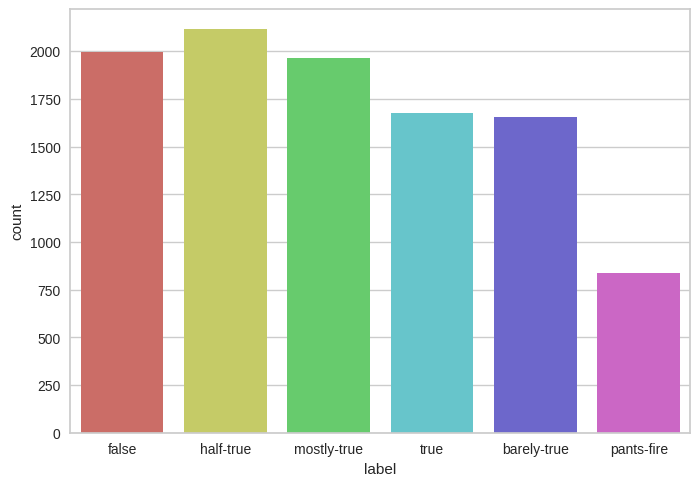

In [86]:
create_distribution(train)

/home/code/Downloads/archive/cleaning.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sn.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

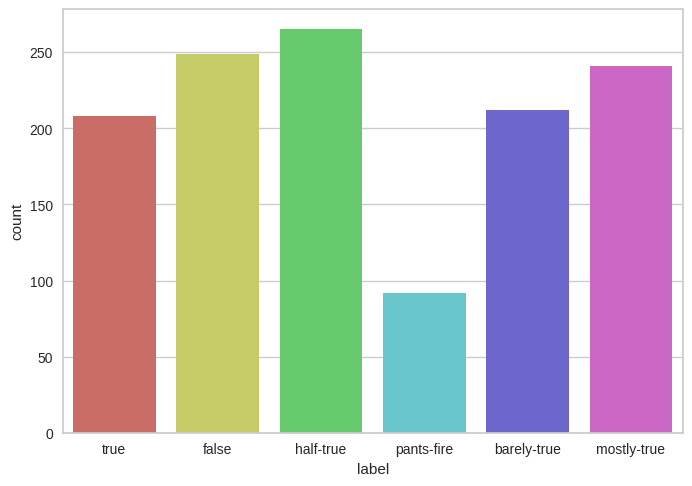

In [87]:
create_distribution(test)

/home/code/Downloads/archive/cleaning.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sn.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

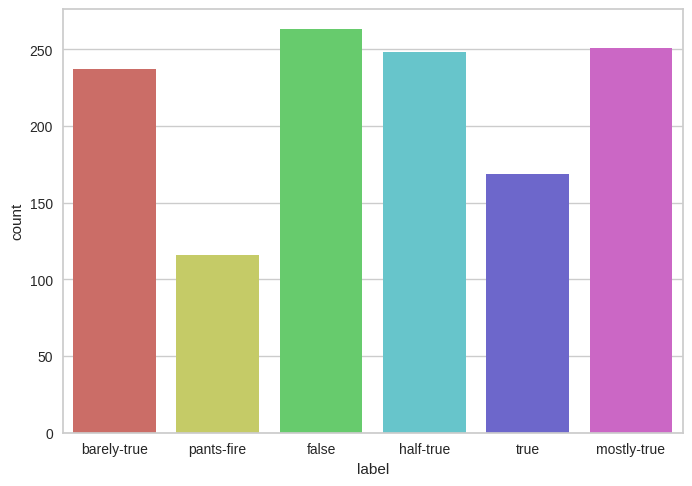

In [88]:
create_distribution(val)

From the above distribution plots, it is evident, majority of the news articles are falling under 'half-true','mostly true' and 'false'lables.

Using Pandas info() method, we see that there is not any null values in the datasets. 

## Mapping the lables into 'True' and 'False'

1. True -- True
2. Mostly-true -- True
3. Half-true -- True
4. Barely-true -- False
5. False -- False
6. Pants-fire -- False

In [90]:
train_news, test_news, val_news = map_lables(train,test,val)

Axes(0.125,0.11;0.775x0.77)


/home/code/Downloads/archive/cleaning.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sn.countplot(x='label', data=dataFile, palette='hls')


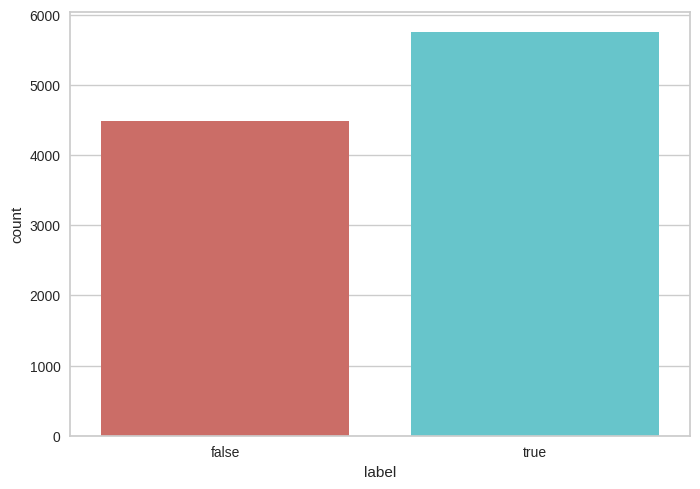

In [91]:
print(create_distribution(train_news))

/home/code/Downloads/archive/cleaning.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sn.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

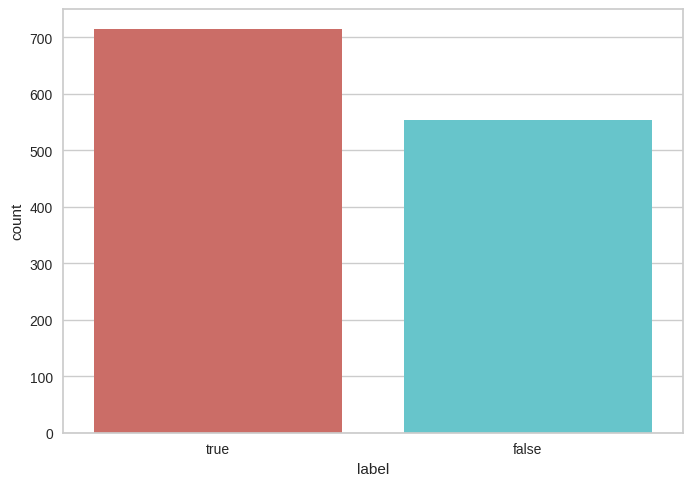

In [92]:
create_distribution(test_news)

/home/code/Downloads/archive/cleaning.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  return sn.countplot(x='label', data=dataFile, palette='hls')


<Axes: xlabel='label', ylabel='count'>

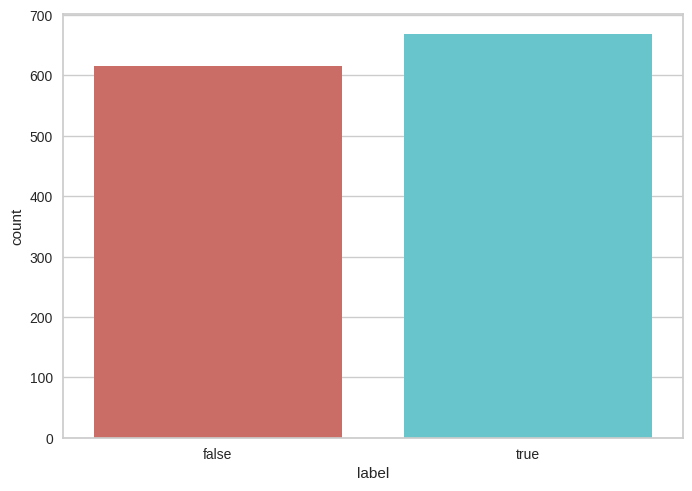

In [93]:
create_distribution(val_news)

By calling distribution funtion on the mapped datasets, we can see that training, test and valid data seems to be failry evenly distributed between the classes.

## Finding distribution of Statement lengths in News Articles

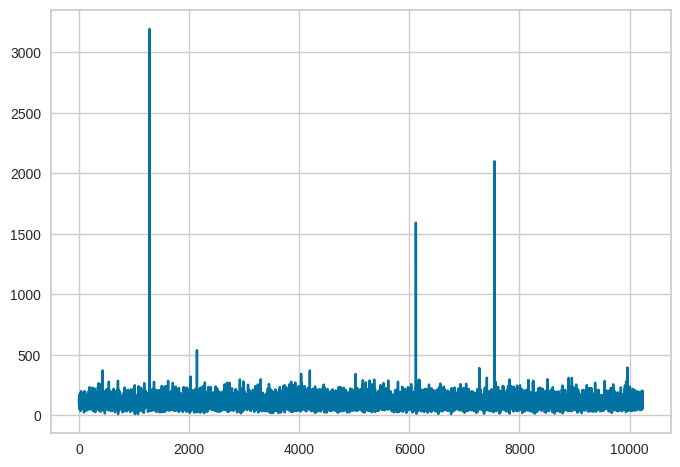

In [94]:
train_line_lengths = [len(statement) for statement in train_news['statement']]
plt.plot(train_line_lengths)
plt.show()

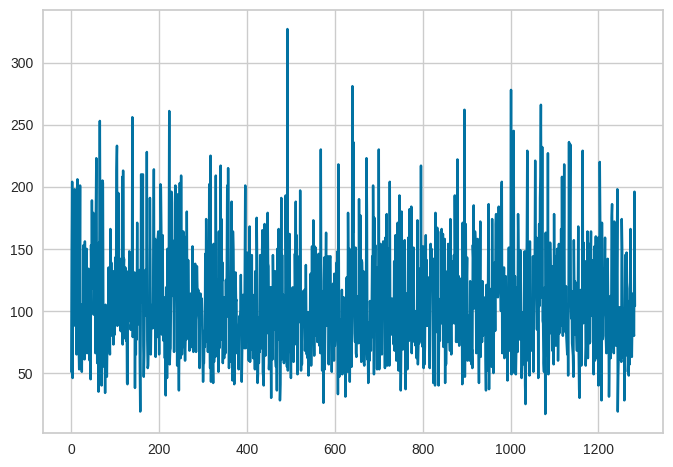

In [95]:
val_line_lengths = [len(statement) for statement in val_news['statement']]
plt.plot(val_line_lengths)
plt.show()

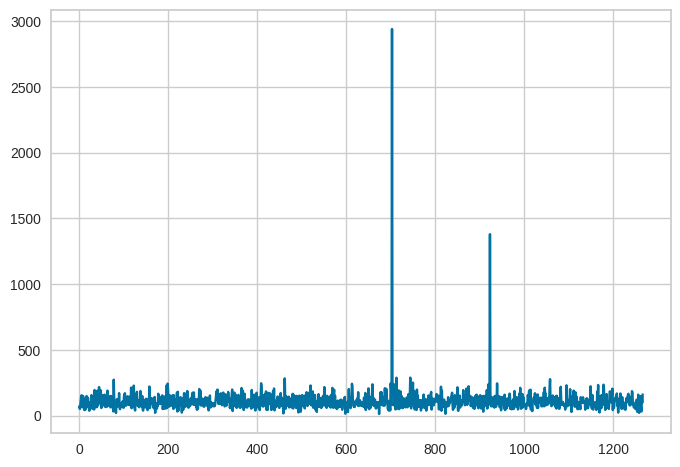

In [96]:
test_line_lengths = [len(statement) for statement in test_news['statement']]
plt.plot(test_line_lengths)
plt.show()

**From the distribution above, it is clear that there are some outliers i.e. statements with a quite high length. Lets get into more details and filter the statements with the length higher than 500.**

In [97]:
train_news['len'] = [len(statement) for statement in train_news['statement']]

In [98]:
train_news[(train_news['len'] > 500)] 

,label,statement,len
1280,true,"Hospitals, doctors, MRIs, surgeries and so for...",3192
2142,false,The fact is that although we have had a presid...,538
6119,true,Georgia has the most restrictive ballot access...,1592
7550,false,The vast majority of the money I got was from ...,2099


In [99]:
train_news

,label,statement,len
0,false,Says the Annies List political group supports ...,82
1,true,When did the decline of coal start? It started...,141
2,true,"Hillary Clinton agrees with John McCain ""by vo...",105
3,false,Health care reform legislation is likely to ma...,78
4,true,The economic turnaround started at the end of ...,54
...,...,...,...
10235,true,There are a larger number of shark attacks in ...,90
10236,true,Democrats have now become the party of the [At...,78
10237,true,Says an alternative to Social Security that op...,176
10238,false,On lifting the U.S. Cuban embargo and allowing...,62


In [100]:
train_news.iloc[7550]['statement']

'The vast majority of the money I got was from small donors all across the country.\'\'\tcampaign-finance\tbarack-obama\tPresident\tIllinois\tdemocrat\t70\t71\t160\t163\t9\tan interview with CNBC\'s John Harwood \n5802.json\ttrue\tThe Democrat-controlled Senate, it hasnt passed a budget in more than 1,000 days.\tdeficit,federal-budget,job-accomplishments\tjohn-boehner\tSpeaker of the House of Representatives\tOhio\trepublican\t13\t22\t11\t4\t2\ta video address\n6153.json\thalf-true\tThe median income in America has dropped by 10 percent in the last four years.\teconomy,income,jobs\tmitt-romney\tFormer governor\tMassachusetts\trepublican\t34\t32\t58\t33\t19\ta speech\n6515.json\tbarely-true\tSays U.S. Senate hopeful Tammy Baldwin voted for a $1 trillion stimulus bill that included a wasteful $800,000 to replace light bulbs.\tenergy,federal-budget,stimulus\tcrossroads-gps\tConservative advocacy group\t\trepublican\t9\t1\t4\t1\t2\ta television ad\n385.json\ttrue\tSays Clinton did not read

In [101]:
test_news['len'] = [len(statement) for statement in test_news['statement']]

## Drop the rows with incorrect parsing.

In [102]:
train_news = train_news[train_news['len'] < 500]
test_news = test_news[test_news['len'] < 500]

**So, the data was not parsed correctly. For now, I will be just ignoring these rows. More data cleaning will be performed later in the process.** 

### Saving the processed version of the datasets.

In [103]:
train_news.to_csv('./data/processed/train.csv', index=False)
val_news.to_csv('./data/processed/val.csv', index=False)
test_news.to_csv('./data/processed/test.csv', index=False)                          

## Feature Engineering

# Import necessary dependencies and settings

In [104]:
import pandas as pd
import numpy as np
import string
import re
import gensim

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('punkt')
import nltk.corpus 
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

from gensim.models.word2vec import Word2Vec

import sys
import os
from pyprojroot import here
sys.path.append(os.path.join(here(), 'src'))
from cleaning import process_text

[nltk_data] Downloading package punkt to /home/code/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/code/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the Data

In [105]:
train_news = pd.read_csv('./data/processed/train.csv')
val_news = pd.read_csv('./data/processed/val.csv')
test_news = pd.read_csv('./data/processed/test.csv')

In [106]:
train_news['statement'].head(10)

0    Says the Annies List political group supports ...
1    When did the decline of coal start? It started...
2    Hillary Clinton agrees with John McCain "by vo...
3    Health care reform legislation is likely to ma...
4    The economic turnaround started at the end of ...
5    The Chicago Bears have had more starting quart...
6    Jim Dunnam has not lived in the district he re...
7    I'm the only person on this stage who has work...
8    However, it took $19.5 million in Oregon Lotte...
9    Says GOP primary opponents Glenn Grothman and ...
Name: statement, dtype: object

# Understanding the data distribution

In [107]:
print("====Label Distribution in Training Data ====")
print(train_news['label'].value_counts())
print("====Label Distribution in Validation Data ====")
print(val_news['label'].value_counts())
print("====Label Distribution in Test Data====")
print(test_news['label'].value_counts())

====Label Distribution in Training Data ====
label
True     5750
False    4486
Name: count, dtype: int64
====Label Distribution in Validation Data ====
label
True     668
False    616
Name: count, dtype: int64
====Label Distribution in Test Data====
label
True     712
False    553
Name: count, dtype: int64


By seeing the label's distribution, it seems like a balanced distribution among classes. As number of 'True' and 'False' lables are almost equally distributed in the dataset.

In [108]:
display(train_news.groupby('label').describe(),val_news.groupby('label').describe(), 
        test_news.groupby('label').describe())

len                                                        
        count        mean        std   min   25%    50%    75%    max
label                                                                
False  4486.0  103.654035  44.978804  11.0  71.0   96.0  130.0  391.0
True   5750.0  108.249565  45.209543  11.0  75.0  101.0  135.0  395.0

statement                                                               
          count unique                                                top freq
label                                                                         
False       616    616  We have less Americans working now than in the...    1
True        668    668     Says nearly half of Oregons children are poor.    1

len                                                        
       count        mean        std   min   25%    50%    75%    max
label                                                               
False  553.0  103.687161  43.302962  12.0  73.0   96.0  130.0  288.0
True   712.0  108.393258  45.626933  14.0  76.0  100.0  136.0  289.0

from above information, we know that:

In training data:
- About 56% of the news statements are True.
<br> In validation data:
- Around 52% of the news statements are True and 48% are False.
<br> In test data:
- 56% of the news statements are True and remaining(44%) are false.

In the next part, lext check the length of each text messages to see whether it is correlated with the text classified as a True or False.

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

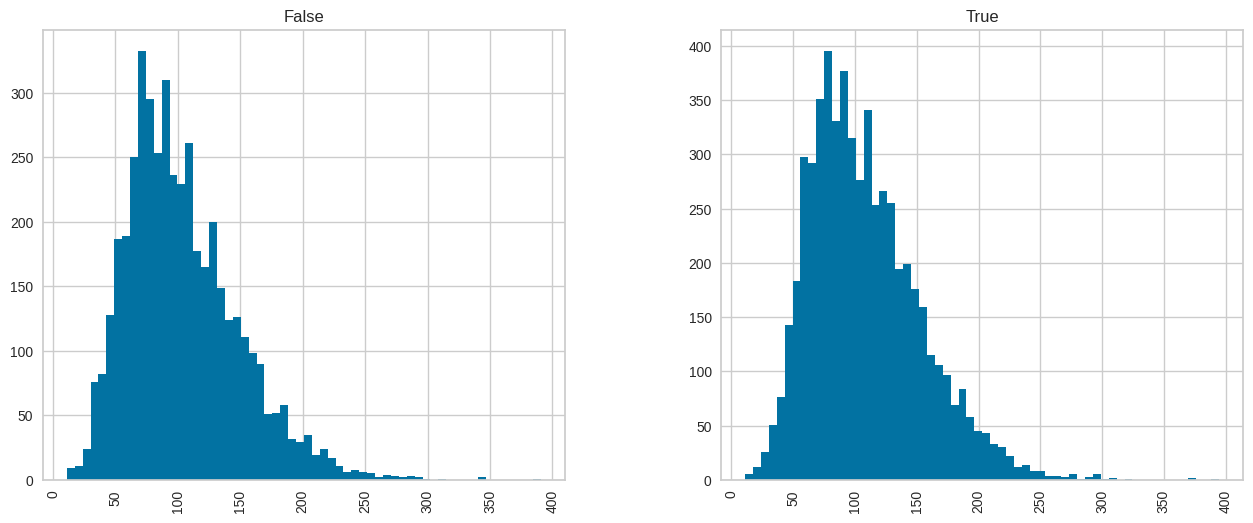

In [109]:
train_news.hist(column='len',by='label',bins=60, figsize=(15,6))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

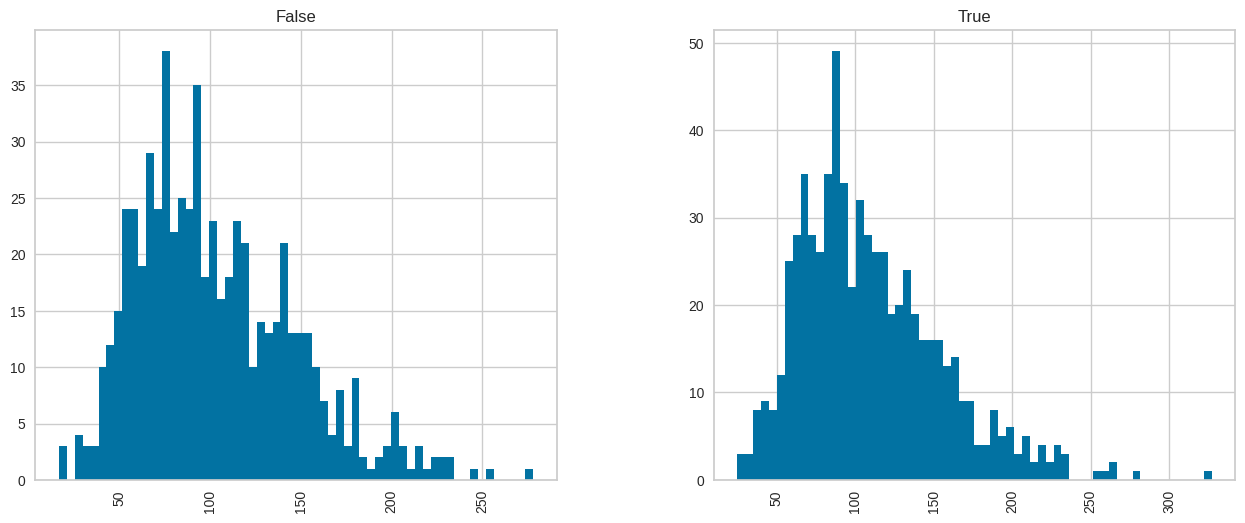

In [110]:
val_news['len'] = val_news['statement'].apply(len)
val_news.hist(column='len',by='label',bins=60, figsize=(15,6))

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

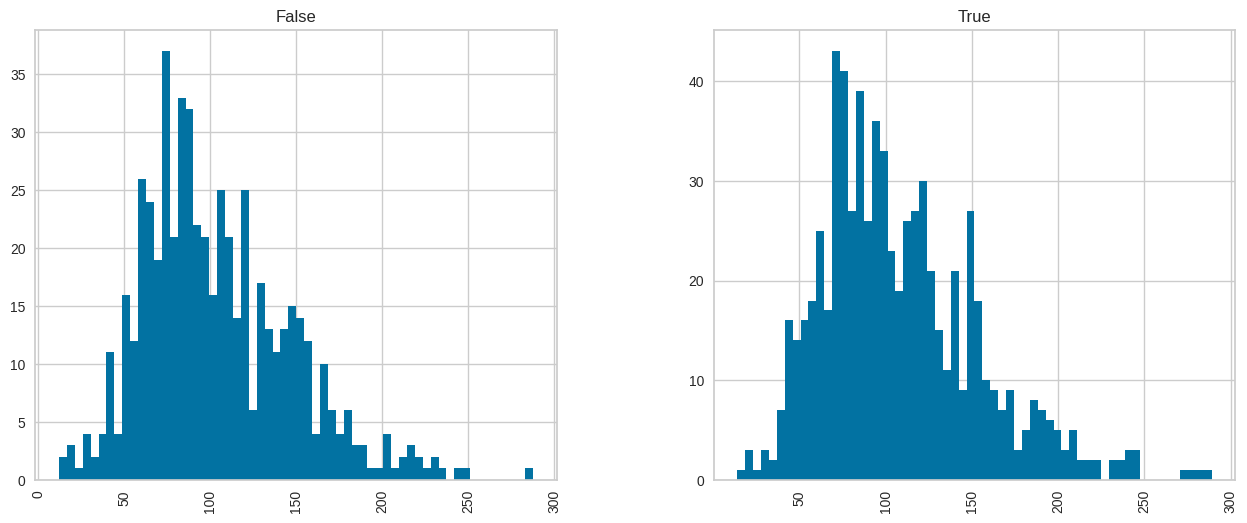

In [111]:
test_news.hist(column='len',by='label',bins=60, figsize=(15,6))

From the above plots, we can see that almost both True and False statements have lengths under 400. Both classes (True & False) are following the same distribution. I don't see a clear pattern between classes.

# Text pre-processing

In [113]:
train_news['statement'].apply(process_text)[0]

['Says',
 'Annies',
 'List',
 'political',
 'group',
 'support',
 'abortion',
 'demand']

# Feature Weighting

Not all words are equally important to a particular document / category. For example, while words like ‘murder’, ‘knife’ and ‘abduction’ are important to a crime related document, words like ‘news’ and ‘reporter’ may not be quite as important. 

## Binary Weighting
The most basic form of feature weighting, is binary weighting. Where if a word is present in a document, the weight is ‘1’ and if the word is absent the weight is ‘0’. 

## CountVectorizer

It Convert a collection of text documents to a matrix of token counts.

In [114]:
count_vect = CountVectorizer(analyzer=process_text, min_df=0., max_df=1.)
cv_matrix = count_vect.fit_transform(train_news.statement)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [115]:
# get all unique words in the corpus
vocab = count_vect.get_feature_names_out()
# show document feature vectors
pd.DataFrame(cv_matrix, columns=vocab)

,AAA,AARP,ABAs,ABC,ACLU,ACORN,ADVISOR,AFC,AFLCIO,AFSCME,...,youth,youve,yr,yuppie,zero,zippo,zombie,zone,zoning,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here by doing ‘count_vect.fit_transform(train_news.statement)’, we are learning the vocabulary dictionary and it returns a Document-Term matrix. [n_samples, n_features]

## Tfidf Weighting 

TF-IDF weighting where words that are unique to a particular document would have higher weights compared to words that are used commonly across documents. 

1. TF (Term Frequency): The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

2. IDF (Inverse Data Frequency): The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

3. Lastly, the TF-IDF is simply the TF multiplied by IDF.

In [116]:
tfidf_vect = TfidfVectorizer(use_idf=True, max_df=0.95, analyzer=process_text)
tfidf_matrix = tfidf_vect.fit_transform(train_news.statement)
tfidf_matrix = tfidf_matrix.toarray()
tfidf_matrix.shape

(10236, 11925)

In [117]:
print(tfidf_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Visualizing patterns in feature vectors in 2D Space

T-SNE : t-distributed stochastic neighbor embedding [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) is a machine learning algorithm for visualization based on Stochastic Neighbor Embedding. It is a nonlinear dimensionality reduction technique well-suited for embedding high-dimensional data for visualization in a low-dimensional space of two or three dimensions. Specifically, it models each high-dimensional object by a two- or three-dimensional point in such a way that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability.

**Training Data**

/home/code/Downloads/archive/venv/lib/python3.8/site-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


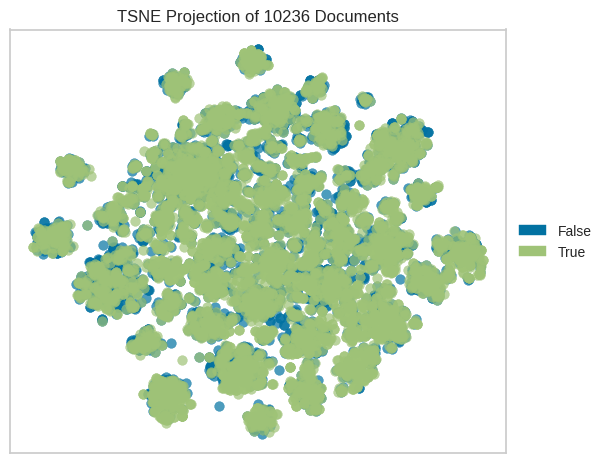

(10236, 11925)


In [118]:
from yellowbrick.text import TSNEVisualizer

tfidf_train_matrix = tfidf_vect.fit_transform(train_news['statement'].values)
# countvect = countv.fit_transform(train_news['statement'].values)

y = train_news.label.values
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(tfidf_train_matrix, y)
tsne.show()

print(tfidf_train_matrix.shape)

**Validation Data**

/home/code/Downloads/archive/venv/lib/python3.8/site-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


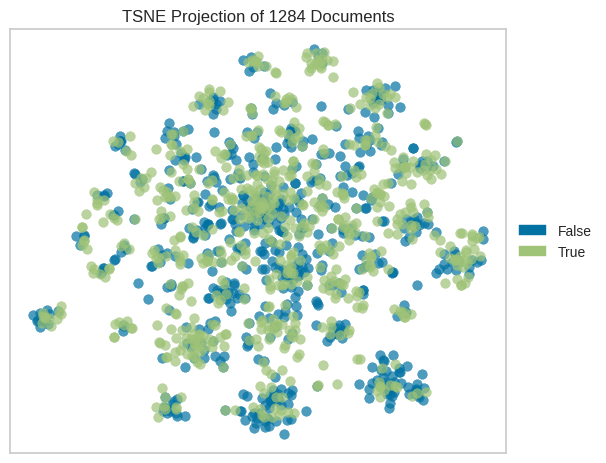

(1284, 3982)


In [119]:
tfidf_val_matrix = tfidf_vect.fit_transform(val_news['statement'].values)
# countvect = countv.fit_transform(val_news['statement'].values)

y = val_news.label.values
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(tfidf_val_matrix, y)
tsne.show()

print(tfidf_val_matrix.shape)

**Test Data**

/home/code/Downloads/archive/venv/lib/python3.8/site-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


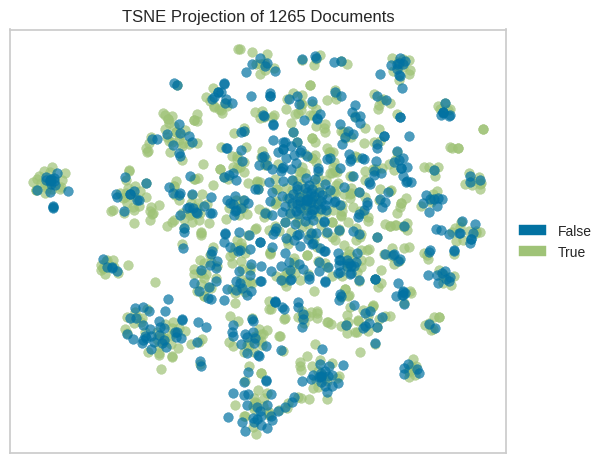

(1265, 3899)


In [120]:
tfidf_test_matrix = tfidf_vect.fit_transform(test_news['statement'].values)
# countvect = countv.fit_transform(test_news['statement'].values)

y = test_news.label.values
# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(tfidf_test_matrix, y)
tsne.show()

print(tfidf_test_matrix.shape)

T-SNE plots are showing the feature vectors in 2-D space. As you can see, True and False labels are clearly overlapped. No unique pattern is visible and moreover, does not help us to see what is making a news statement to fall into either of the categories. This could be one of the reasons why our models are not doing well with data. We should also try more feature engineering techniques if we want to make sure there is any pattern that exists in the data. 

# human benchmark on the data pattern

Lets take 5 True and 5 false news statements to manually find the pattern.

False News

1. Says the Annies List political group supports third-trimester abortions on demand.
2. Health care reform legislation is likely to mandate free sex change surgeries.
3. Jim Dunnam has not lived in the district he represents for years now.
4. When Mitt Romney was governor of Massachusetts, we didnt just slow the rate of growth of our government, we actually cut it.
5. Most of the (Affordable Care Act) has already in some sense been waived or otherwise suspended.


True News
1. When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
2. Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
3. The economic turnaround started at the end of my term.
4. The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.
5. I'm the only person on this stage who has worked actively just last year passing, along with Russ Feingold, some of the toughest ethics reform since Watergate.

After manually evaluating the news statements from both classes, I don't see any specific pattern for both. Even if our model performs with 50% accuracy, that will be considered a good model. 

## Training

# Import necessary dependencies and settings

In [121]:
import pandas as pd
import numpy as np
import string
import logging
import re
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import  LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper

import nltk
from nltk.corpus import stopwords

#import python scripts to use user_defined functions
import sys
import os
from pyprojroot import here
sys.path.append(os.path.join(here(), 'src'))

from cleaning import process_text, process_text2
from training import extract_features, train_model, extract_final_features, train_final_model  
from prediction import get_predictions

# Loading the Data

In [122]:
train_news = pd.read_csv('./data/processed/train.csv').drop('len', axis=1)
val_news = pd.read_csv('./data/processed/val.csv')
test_news = pd.read_csv('./data/processed/test.csv').drop('len', axis=1)

In [123]:
train_news.head()

,label,statement
0,False,Says the Annies List political group supports ...
1,True,When did the decline of coal start? It started...
2,True,"Hillary Clinton agrees with John McCain ""by vo..."
3,False,Health care reform legislation is likely to ma...
4,True,The economic turnaround started at the end of ...


In [124]:
display(train_news), display(val_news), display(test_news)

,label,statement
0,False,Says the Annies List political group supports ...
1,True,When did the decline of coal start? It started...
2,True,"Hillary Clinton agrees with John McCain ""by vo..."
3,False,Health care reform legislation is likely to ma...
4,True,The economic turnaround started at the end of ...
...,...,...
10231,True,There are a larger number of shark attacks in ...
10232,True,Democrats have now become the party of the [At...
10233,True,Says an alternative to Social Security that op...
10234,False,On lifting the U.S. Cuban embargo and allowing...


,label,statement
0,False,We have less Americans working now than in the...
1,False,"When Obama was sworn into office, he DID NOT u..."
2,False,Says Having organizations parading as being so...
3,True,Says nearly half of Oregons children are poor.
4,True,On attacks by Republicans that various program...
...,...,...
1279,True,"For the first time in more than a decade, impo..."
1280,True,Says Donald Trump has bankrupted his companies...
1281,True,"John McCain and George Bush have ""absolutely n..."
1282,False,A new poll shows 62 percent support the presid...


,label,statement
0,True,Building a wall on the U.S.-Mexico border will...
1,False,Wisconsin is on pace to double the number of l...
2,False,Says John McCain has done nothing to help the ...
3,True,Suzanne Bonamici supports a plan that will cut...
4,False,When asked by a reporter whether hes at the ce...
...,...,...
1260,True,Says his budget provides the highest state fun...
1261,False,Ive been here almost every day.
1262,False,"In the early 1980s, Sen. Edward Kennedy secret..."
1263,False,Says an EPA permit languished under Strickland...


(None, None, None)

## Merging train & val data for K-Fold

In [125]:
"""
Merging the training and validation data together, so that I can peroform k-fold cross validation 
and shuffle the data to reduce the bias.
"""
labelEncoder = LabelEncoder()
frames = [train_news, val_news]
train_val = pd.concat(frames)
train_val['label'].value_counts()
train_val['label'] = labelEncoder.fit_transform(train_val['label'])

In [126]:
train_val

,label,statement
0,0,Says the Annies List political group supports ...
1,1,When did the decline of coal start? It started...
2,1,"Hillary Clinton agrees with John McCain ""by vo..."
3,0,Health care reform legislation is likely to ma...
4,1,The economic turnaround started at the end of ...
...,...,...
1279,1,"For the first time in more than a decade, impo..."
1280,1,Says Donald Trump has bankrupted his companies...
1281,1,"John McCain and George Bush have ""absolutely n..."
1282,0,A new poll shows 62 percent support the presid...


## Feature Weighting

Not all words are equally important to a particular document / category. For example, while words like ‘murder’, ‘knife’ and ‘abduction’ are important to a crime related document, words like ‘news’ and ‘reporter’ may not be quite as important. 

### Binary Weighting
The most basic form of feature weighting, is binary weighting. Where if a word is present in a document, the weight is ‘1’ and if the word is absent the weight is ‘0’. 

### CountVectorizer

It Convert a collection of text documents to a matrix of token counts.


### Tfidf Weighting 

TF-IDF weighting where words that are unique to a particular document would have higher weights compared to words that are used commonly across documents. 

1. TF (Term Frequency): The number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency.

2. IDF (Inverse Data Frequency): The log of the number of documents divided by the number of documents that contain the word w. Inverse data frequency determines the weight of rare words across all documents in the corpus.

3. Lastly, the TF-IDF is simply the TF multiplied by IDF.

## Metric

I need to minimize false positives (number of fake news predicted as real news) as it can be very misleadling . For class 0 i.e. 'fake', recall should be high as well as precision. Because we want our model to perform well on both classes (real & fake). In short, we need to maximize f1-score.

### Cases I considered to choose the right metric

**1. Maximizing recall of class 0 (fake) or minimizing false positives(FP)?**
Well, in extreme case, what if all the news predicted by model are labelled as 'fake'. Recall will still be 1, but overall model is really bad i.e. not able to predict class 1 ('real'). 

Ex=> TN = 553, FP = 0, TP = 0, FN = 714

Class0-Recall = TN / (TN + FP) = 1
Class0-Precision = TN / (TN + FN) = 0.43

F1-Score = 2 * Class0-Recall * Class0-Precision/(Class0-Recall + Class0-Precision) = 0.60

Recall, Precision and F1-score for class 1 will be 0.

**2. Considering an extreme case, if all the news classified as True (Even, fake news are predicted as True).**

Ex=>  TN = 0, FP = 553, TP = 714, FN =0
In that case, TN will be 0, which led to Precision 0, Recall 0 and F1 = 0 for class 0 ('fake').

For class 1, Class1-Recall = TP / (TP + FN) = 1
Class1-Precision = TP / (TP + FP) = 0.56

## Word2Vec

Word2vec is a type of mapping that allows words with similar meaning to have similar vector representation.

The idea behind Word2vec is rather simple: we want to use the surrounding words to represent the target words with a Neural Network whose hidden layer encodes the word representation.

The idea behind Word2vec is rather simple: we want to use the surrounding words to represent the target words with a Neural Network whose hidden layer encodes the word representation.

First we load a word2vec model. It has been pre-trained by Google on a 100 billion word Google News corpus.

In [127]:
train_val['clean_statement'] = train_val['statement'].apply(lambda x: process_text(x))

In [128]:
train_val['clean_statement1'] = train_val['clean_statement'].apply(lambda x: process_text2(x))

In [129]:
train_val

,label,statement,clean_statement,clean_statement1
0,0,Says the Annies List political group supports ...,"[Says, Annies, List, political, group, support...",Says Annies List political group support abort...
1,1,When did the decline of coal start? It started...,"[decline, coal, start, started, natural, gas, ...",decline coal start started natural gas took st...
2,1,"Hillary Clinton agrees with John McCain ""by vo...","[Hillary, Clinton, agrees, John, McCain, votin...",Hillary Clinton agrees John McCain voting give...
3,0,Health care reform legislation is likely to ma...,"[Health, care, reform, legislation, likely, ma...",Health care reform legislation likely mandate ...
4,1,The economic turnaround started at the end of ...,"[economic, turnaround, started, end, term]",economic turnaround started end term
...,...,...,...,...
1279,1,"For the first time in more than a decade, impo...","[first, time, decade, import, accounted, le, h...",first time decade import accounted le half oil...
1280,1,Says Donald Trump has bankrupted his companies...,"[Says, Donald, Trump, bankrupted, company, twi...",Says Donald Trump bankrupted company twice fou...
1281,1,"John McCain and George Bush have ""absolutely n...","[John, McCain, George, Bush, absolutely, plan,...",John McCain George Bush absolutely plan univer...
1282,0,A new poll shows 62 percent support the presid...,"[new, poll, show, percent, support, president,...",new poll show percent support president plan r...


In [131]:
import gensim.downloader as api

# Load a pre-trained model from gensim-data
wv = api.load('word2vec-google-news-300')

# Optional: Optimize memory usage
wv.init_sims(replace=True)

[==================================================] 100.0% 1662.8/1662.8MB downloaded


2024-07-03 12:02:14,773 : INFO : word2vec-google-news-300 downloaded
2024-07-03 12:02:14,778 : INFO : loading projection weights from /home/code/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz
2024-07-03 12:02:45,876 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from /home/code/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2024-07-03T12:02:45.876108', 'gensim': '4.3.2', 'python': '3.8.10 (default, Nov 22 2023, 10:22:35) \n[GCC 9.4.0]', 'platform': 'Linux-5.15.0-113-generic-x86_64-with-glibc2.29', 'event': 'load_word2vec_format'}
/tmp/ipykernel_119062/1052149891.py:7: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  wv.init_sims(replace=True)
2024-07-03 12:02:47,180 : WARNING : destructive init_sims(replace=True) deprecated & no longer requi

In [133]:
from itertools import islice
# Using index_to_key list to get a slice of words
list(islice(wv.index_to_key, 13030, 13050))

['Memorial_Hospital',
 'Seniors',
 'memorandum',
 'elephant',
 'Trump',
 'Census',
 'pilgrims',
 'De',
 'Dogs',
 '###-####_ext',
 'chaotic',
 'forgive',
 'scholar',
 'Lottery',
 'decreasing',
 'Supervisor',
 'fundamentally',
 'Fitness',
 'abundance',
 'Hold']

In [136]:
# vocab size
len(wv.key_to_index)


3000000

In [137]:
#printing similarity index
print(wv.most_similar('Hillary'))

[('Hillary_Clinton', 0.7051242589950562), ('Clinton', 0.6970474123954773), ('Clintons', 0.659970760345459), ('HIllary', 0.6327946782112122), ('Barack', 0.6296452283859253), ('Sen._Hillary_Clinton', 0.6141951084136963), ('Barack_Obama', 0.6014484167098999), ('Hil_lary', 0.5962479114532471), ('Billary', 0.5903605222702026), ('Mcain', 0.5828679203987122)]


BOW based approaches that includes averaging, summation, weighted addition. The common way is to average the two word vectors

In [145]:
#Word averaging
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.key_to_index:
            mean.append(wv.get_vector(word))
            all_words.add(wv.key_to_index[word])

    if not mean:
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, clean_title_publish) for clean_title_publish in text_list])

In [146]:
# We will tokenize the text and apply the tokenization to “clean_statement1” column, and apply word vector averaging to tokenized text.
# Tokenization
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [147]:
train, test = train_test_split(train_val, test_size=0.2,shuffle=True)
test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['clean_statement1']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['clean_statement1']), axis=1).values

In [148]:
train_tokenized

array([list(['Says', 'Bernie', 'Sanders', 'voted', 'regime', 'change', 'respect', 'Libya']),
       list(['Page', 'health', 'care', 'bill', 'establish', 'schoolbased', 'health', 'clinic', 'child', 'indoctrinated', 'grandchild', 'may', 'aborted']),
       list(['Georgias', 'illegal', 'immigration', 'crackdown', 'law', 'called', 'Brown', 'Codes', 'similarity', 'Black', 'Codes', 'governing', 'black', 'Civil', 'War']),
       ...,
       list(['Says', 'crime', 'statistic', 'show', 'black', 'kill', 'percent', 'white', 'homicide', 'victim']),
       list(['campaign', 'finished', 'last', 'quarter', 'reporting', 'cash', 'hand', 'Republican', 'field', 'million', 'bank', 'million', 'Jeb', 'Bush', 'campaign']),
       list(['Youve', 'got', 'people', 'wanting', 'moose', 'hunting', 'New', 'Hampshire', 'want', 'Obamacare'])],
      dtype=object)

In [149]:
test_tokenized

array([list(['Fast', 'Furious', 'began', 'Bush']),
       list(['majority', 'state', 'marry', 'freely', 'still', 'fired', 'love']),
       list(['Carlos', 'LpezCantera', 'staunchly', 'supported', 'Florida', 'bill', 'modeled', 'Arizonas', 'immigration', 'law']),
       ...,
       list(['Says', 'Mike', 'Dovilla', 'support', 'plan', 'could', 'allow', 'foreign', 'corporation', 'take', 'Ohio', 'Turnpike']),
       list(['Senate', 'candidate', 'Jack', 'Kingston', 'spent', 'tax', 'dollar', 'thousand', 'wasteful', 'earmark']),
       list(['Says', 'abill', 'vetoed', 'give', 'driver', 'license', 'certain', 'immigrant', 'known', 'Dreamers', 'would', 'havechanged', 'nothing'])],
      dtype=object)

In [150]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

In [151]:
X_test_word_average

array([[ 0.11393015,  0.0890207 ,  0.00531146, ...,  0.09184055,
         0.00552197,  0.06932838],
       [ 0.09231516, -0.08243302, -0.00316303, ..., -0.06853795,
         0.04829807, -0.02001462],
       [-0.05394489,  0.00794969,  0.03816953, ..., -0.05394403,
         0.10525143,  0.04951517],
       ...,
       [ 0.0399433 , -0.00506502,  0.01556392, ..., -0.03718626,
        -0.00713368, -0.07231632],
       [-0.01878311,  0.00703517, -0.0503887 , ..., -0.00524186,
         0.04723841,  0.01650292],
       [ 0.04147798, -0.05615636,  0.0707259 , ..., -0.01811274,
         0.03755251, -0.04794161]])

## Model Training

## Text Classification Algorithms

1. Naive Bayes (NB)
2. Logistics Regression
3. SVM
4. Random Forest

## Naive Bayes

Well, when assumption of independence holds, a Naive Bayes classifier performs better compare to other models like logistic regression and you need less training data. An advantage of naive Bayes is that it only requires a small number of training data to estimate the parameters necessary for classification. 

Bayes’ Theorem provides a way that we can calculate the probability of a piece of data belonging to a given class, given our prior knowledge. Bayes’ Theorem is stated as:

P(class|data) = (P(data|class) * P(class)) / P(data)

Where P(class|data) is the probability of class given the provided data.

Naive Bayes is a classification algorithm for binary (two-class) and multiclass classification problems. It is called Naive Bayes or idiot Bayes because the calculations of the probabilities for each class are simplified to make their calculations tractable.

Rather than attempting to calculate the probabilities of each attribute value, they are assumed to be conditionally independent given the class value.

This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

### Multinomial NB

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work

### Train Models with Different Types of Features

In [152]:
field='statement'
feature_reps=['binary','counts','tfidf']
nb_results=[]
nb_clf = MultinomialNB()
for feature_rep in feature_reps:
        print(f'Model - {feature_rep} features with statement')
        nb_model,transformer,score=train_model(nb_clf,train_val,field=field,feature_rep=feature_rep)
        nb_results.append([field,feature_rep,score])

2024-07-03 12:07:31,647 : INFO : Starting model training...
2024-07-03 12:07:31,653 : INFO : Extracting features and creating vocabulary...


Model - binary features with statement


2024-07-03 12:07:50,333 : INFO : Training a Classification Model...
2024-07-03 12:07:50,338 : INFO : Starting evaluation...
2024-07-03 12:07:50,352 : INFO : Done training and evaluation.
2024-07-03 12:07:50,354 : INFO : Starting model training...
2024-07-03 12:07:50,360 : INFO : Extracting features and creating vocabulary...


              precision    recall  f1-score   support

           0       0.56      0.48      0.52      1248
           1       0.64      0.71      0.68      1632

    accuracy                           0.61      2880
   macro avg       0.60      0.60      0.60      2880
weighted avg       0.61      0.61      0.61      2880

[[ 603  645]
 [ 471 1161]]
Model - counts features with statement


2024-07-03 12:08:08,653 : INFO : Training a Classification Model...
2024-07-03 12:08:08,657 : INFO : Starting evaluation...
2024-07-03 12:08:08,671 : INFO : Done training and evaluation.
2024-07-03 12:08:08,673 : INFO : Starting model training...
2024-07-03 12:08:08,677 : INFO : Extracting features and creating vocabulary...


              precision    recall  f1-score   support

           0       0.56      0.49      0.52      1248
           1       0.64      0.71      0.67      1632

    accuracy                           0.61      2880
   macro avg       0.60      0.60      0.60      2880
weighted avg       0.61      0.61      0.61      2880

[[ 610  638]
 [ 479 1153]]
Model - tfidf features with statement


2024-07-03 12:08:28,065 : INFO : Training a Classification Model...
2024-07-03 12:08:28,073 : INFO : Starting evaluation...
2024-07-03 12:08:28,099 : INFO : Done training and evaluation.


              precision    recall  f1-score   support

           0       0.58      0.32      0.41      1248
           1       0.61      0.83      0.70      1632

    accuracy                           0.61      2880
   macro avg       0.60      0.57      0.56      2880
weighted avg       0.60      0.61      0.58      2880

[[ 398  850]
 [ 284 1348]]


### Naive Bayes Results of Various Models

In [153]:
nb_df_results=pd.DataFrame(nb_results,columns=['text_fields','feature_representation','f1-score'])
nb_df_results.sort_values(by=['f1-score'],ascending=False)

,text_fields,feature_representation,f1-score
2,statement,tfidf,0.703916
0,statement,binary,0.675393
1,statement,counts,0.673678


## logistic regression

The underlying algorithm is also fairly easy to understand. More importantly, in the NLP world, it’s generally accepted that Logistic Regression is a great starter algorithm for text related classification (https://web.stanford.edu/~jurafsky/slp3/5.pdf). 

**How hypothesis makes prediction in logistics regression?**

This algorithm uses sigmoid function(g(z)). If we want to predict y=1 or y=0.
If estimated probability of y=1 is h(x)>=0.5 then the ouput is more likely to be "y=1" 
but if  h(x) < 0.5, the output is more likely to be is "y=0".

### Train Models with Different Types of Features¶

In [156]:
field='statement'
feature_reps=['binary','counts','tfidf']
lr_results=[]
LogR_clf = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=0.1, penalty='l2',max_iter=500)

for feature_rep in feature_reps:
        print(f'Model - {feature_rep} features with statement')
        lr_model,transformer,score=train_model(LogR_clf,train_val,field=field,feature_rep=feature_rep)
        lr_results.append([field,feature_rep,score])

2024-07-03 12:08:28,199 : INFO : Starting model training...
2024-07-03 12:08:28,210 : INFO : Extracting features and creating vocabulary...


Model - binary features with statement


2024-07-03 12:08:47,908 : INFO : Training a Classification Model...
2024-07-03 12:08:47,968 : INFO : Starting evaluation...
2024-07-03 12:08:47,989 : INFO : Done training and evaluation.
2024-07-03 12:08:47,990 : INFO : Starting model training...
2024-07-03 12:08:47,995 : INFO : Extracting features and creating vocabulary...


[LibLinear]iter  1 act 7.810e+01 pre 7.561e+01 delta 7.673e+00 f 5.989e+02 |g| 5.866e+01 CG   6
iter  2 act 2.727e+00 pre 2.715e+00 delta 7.673e+00 f 5.208e+02 |g| 7.024e+00 CG   7
iter  3 act 3.007e-02 pre 3.004e-02 delta 7.673e+00 f 5.181e+02 |g| 5.764e-01 CG   8
iter  4 act 1.116e-04 pre 1.116e-04 delta 7.673e+00 f 5.180e+02 |g| 3.513e-02 CG   8
iter  5 act 8.005e-07 pre 8.005e-07 delta 7.673e+00 f 5.180e+02 |g| 2.692e-03 CG   8
              precision    recall  f1-score   support

           0       0.56      0.47      0.51      1248
           1       0.64      0.72      0.68      1632

    accuracy                           0.61      2880
   macro avg       0.60      0.60      0.59      2880
weighted avg       0.61      0.61      0.61      2880

[[ 585  663]
 [ 454 1178]]
Model - counts features with statement


2024-07-03 12:09:06,904 : INFO : Training a Classification Model...
2024-07-03 12:09:06,981 : INFO : Starting evaluation...
2024-07-03 12:09:07,002 : INFO : Done training and evaluation.
2024-07-03 12:09:07,004 : INFO : Starting model training...
2024-07-03 12:09:07,008 : INFO : Extracting features and creating vocabulary...


[LibLinear]iter  1 act 8.081e+01 pre 7.810e+01 delta 7.853e+00 f 5.989e+02 |g| 6.178e+01 CG   7
iter  2 act 2.272e+00 pre 2.254e+00 delta 7.853e+00 f 5.181e+02 |g| 7.493e+00 CG   7
iter  3 act 3.448e-02 pre 3.442e-02 delta 7.853e+00 f 5.158e+02 |g| 6.859e-01 CG   9
iter  4 act 1.356e-04 pre 1.356e-04 delta 7.853e+00 f 5.158e+02 |g| 4.356e-02 CG   8
iter  5 act 1.947e-06 pre 1.947e-06 delta 7.853e+00 f 5.158e+02 |g| 3.955e-03 CG  10
              precision    recall  f1-score   support

           0       0.56      0.47      0.51      1248
           1       0.64      0.72      0.68      1632

    accuracy                           0.61      2880
   macro avg       0.60      0.59      0.59      2880
weighted avg       0.61      0.61      0.61      2880

[[ 585  663]
 [ 456 1176]]
Model - tfidf features with statement


2024-07-03 12:09:21,820 : INFO : Training a Classification Model...
2024-07-03 12:09:21,837 : INFO : Starting evaluation...
2024-07-03 12:09:21,859 : INFO : Done training and evaluation.


[LibLinear]iter  1 act 2.397e+01 pre 2.380e+01 delta 4.900e+00 f 5.989e+02 |g| 4.752e+01 CG   2
iter  2 act 1.470e+00 pre 1.471e+00 delta 4.900e+00 f 5.749e+02 |g| 2.236e+00 CG   3
iter  3 act 1.189e-03 pre 1.189e-03 delta 4.900e+00 f 5.734e+02 |g| 6.739e-02 CG   3
iter  4 act 2.383e-06 pre 2.383e-06 delta 4.900e+00 f 5.734e+02 |g| 2.470e-03 CG   3
              precision    recall  f1-score   support

           0       0.61      0.20      0.30      1248
           1       0.60      0.90      0.72      1632

    accuracy                           0.60      2880
   macro avg       0.60      0.55      0.51      2880
weighted avg       0.60      0.60      0.54      2880

[[ 248 1000]
 [ 157 1475]]


### Logistics Regression Results of Various Models

In [157]:
lr_df_results=pd.DataFrame(lr_results,columns=['text_fields','feature_representation','f1-score'])
lr_df_results.sort_values(by=['f1-score'],ascending=False)

,text_fields,feature_representation,f1-score
2,statement,tfidf,0.718286
0,statement,binary,0.678376
1,statement,counts,0.677615


Here you see how the performance of logistics model is improved using tfidf over counts and binary weightning.

### Logistics Regression with word2vec

In [158]:
LogR_clf = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=0.1, penalty='l2',max_iter=500)
LogR_clf.fit(X_train_word_average, train['label']) 

[LibLinear]iter  1 act 2.674e+01 pre 2.619e+01 delta 2.292e+00 f 6.388e+02 |g| 6.710e+01 CG   2
cg reaches trust region boundary
iter  2 act 5.439e+00 pre 5.420e+00 delta 2.328e+00 f 6.121e+02 |g| 5.720e+00 CG   3
iter  3 act 4.335e-01 pre 4.344e-01 delta 2.328e+00 f 6.066e+02 |g| 1.562e+00 CG   5
iter  4 act 5.026e-04 pre 5.026e-04 delta 2.328e+00 f 6.062e+02 |g| 5.802e-02 CG   5
iter  5 act 2.105e-06 pre 2.105e-06 delta 2.328e+00 f 6.062e+02 |g| 3.250e-03 CG   5


LogisticRegression(C=0.1, max_iter=500, random_state=0, solver='liblinear',
                   verbose=1)

In [159]:
y_pred_test_log=LogR_clf.predict(X_test_word_average)
# y_pred_train_log=LogR_clf.predict(X_train_word_average)

In [160]:
score = f1_score(test.label,y_pred_test_log)
print(classification_report(test.label,y_pred_test_log))
print(confusion_matrix(test.label,y_pred_test_log))

              precision    recall  f1-score   support

           0       0.59      0.38      0.46      1034
           1       0.61      0.78      0.69      1270

    accuracy                           0.60      2304
   macro avg       0.60      0.58      0.57      2304
weighted avg       0.60      0.60      0.59      2304

[[394 640]
 [274 996]]


## SVM

Support vector machines is an algorithm that determines the best decision boundary between vectors that belong to a given group (or category) and vectors that do not belong to it. That’s it. It can be applied to any kind of vectors which encode any kind of data. This means that in order to leverage the power of svm text classification, texts have to be transformed into vectors.

So, when SVM determines the decision boundary we mentioned above, SVM decides where to draw the best “line” (or the best hyperplane) that divides the space into two subspaces: one for the vectors which belong to the given category and one for the vectors which do not belong to it.

### Train Models with Different Types of Features¶

In [162]:
field='statement'
feature_reps=['binary','counts','tfidf']
svm_results=[]
svm_clf = svm.LinearSVC()

for feature_rep in feature_reps:
        print(f'SVM Model - {feature_rep} features with statement')
        svm_model,transformer,score=train_model(svm_clf,train_val,field=field,feature_rep=feature_rep)
        svm_results.append([field,feature_rep,score])

2024-07-03 12:09:22,293 : INFO : Starting model training...
2024-07-03 12:09:22,307 : INFO : Extracting features and creating vocabulary...


SVM Model - binary features with statement


2024-07-03 12:09:36,562 : INFO : Training a Classification Model...
/home/code/Downloads/archive/venv/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
2024-07-03 12:09:36,649 : INFO : Starting evaluation...
2024-07-03 12:09:36,658 : INFO : Done training and evaluation.
2024-07-03 12:09:36,659 : INFO : Starting model training...
2024-07-03 12:09:36,663 : INFO : Extracting features and creating vocabulary...


              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1248
           1       0.62      0.62      0.62      1632

    accuracy                           0.57      2880
   macro avg       0.56      0.56      0.56      2880
weighted avg       0.57      0.57      0.57      2880

[[ 633  615]
 [ 626 1006]]
SVM Model - counts features with statement


2024-07-03 12:09:55,222 : INFO : Training a Classification Model...
/home/code/Downloads/archive/venv/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
2024-07-03 12:09:55,356 : INFO : Starting evaluation...
2024-07-03 12:09:55,365 : INFO : Done training and evaluation.
2024-07-03 12:09:55,366 : INFO : Starting model training...
2024-07-03 12:09:55,369 : INFO : Extracting features and creating vocabulary...


              precision    recall  f1-score   support

           0       0.50      0.51      0.50      1248
           1       0.62      0.61      0.61      1632

    accuracy                           0.56      2880
   macro avg       0.56      0.56      0.56      2880
weighted avg       0.57      0.56      0.56      2880

[[631 617]
 [637 995]]
SVM Model - tfidf features with statement


2024-07-03 12:10:09,884 : INFO : Training a Classification Model...
/home/code/Downloads/archive/venv/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
2024-07-03 12:10:09,907 : INFO : Starting evaluation...
2024-07-03 12:10:09,919 : INFO : Done training and evaluation.


              precision    recall  f1-score   support

           0       0.52      0.50      0.51      1248
           1       0.63      0.65      0.64      1632

    accuracy                           0.59      2880
   macro avg       0.58      0.58      0.58      2880
weighted avg       0.58      0.59      0.59      2880

[[ 627  621]
 [ 570 1062]]


### SVM Results of Various Models

In [163]:
svm_df_results=pd.DataFrame(svm_results,columns=['text_fields','feature_representation','f1-score'])
svm_df_results.sort_values(by=['f1-score'],ascending=False)

,text_fields,feature_representation,f1-score
2,statement,tfidf,0.640724
0,statement,binary,0.618506
1,statement,counts,0.613440


### SVM with word2vec

In [164]:
svm_clf = svm.LinearSVC()
svm_clf.fit(X_train_word_average, train['label'])

/home/code/Downloads/archive/venv/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [165]:
y_pred_test_svm=svm_clf.predict(X_test_word_average)

In [166]:
score = f1_score(test.label,y_pred_test_svm)
print(classification_report(test.label,y_pred_test_svm))
print(confusion_matrix(test.label,y_pred_test_svm))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49      1034
           1       0.61      0.72      0.66      1270

    accuracy                           0.59      2304
   macro avg       0.59      0.58      0.58      2304
weighted avg       0.59      0.59      0.59      2304

[[455 579]
 [358 912]]


## Random Forest

Given the nature of random forests (a bagging decision tree), it is true that you may come up with a rather weak classifier, especially if only a couple of features are truly significant to determine the outcome.

However, keep in mind that in the case of text classification, a preprocessing phase is required to get either your TF or TF-IDF matrix, through which you have already made a selection of pertinent features. Potentially, all features are relevant in this matrix, so the random forest may be performant when you predict your outcome. (source: https://stats.stackexchange.com/questions/343954/random-forest-short-text-classification)

### Train Models with Different Types of Features¶

In [167]:
field='statement'
feature_reps=['binary','counts','tfidf']
rf_results=[]
rf_clf = RandomForestClassifier(n_estimators=500)

for feature_rep in feature_reps:
        rf_model,transformer,score=train_model(rf_clf,train_val,field=field,feature_rep=feature_rep)
        rf_results.append([field,feature_rep,score])

2024-07-03 12:10:10,570 : INFO : Starting model training...
2024-07-03 12:10:10,577 : INFO : Extracting features and creating vocabulary...
2024-07-03 12:10:24,985 : INFO : Training a Classification Model...
2024-07-03 12:11:16,465 : INFO : Starting evaluation...
2024-07-03 12:11:16,473 : INFO : Done training and evaluation.
2024-07-03 12:11:16,475 : INFO : Starting model training...
2024-07-03 12:11:16,478 : INFO : Extracting features and creating vocabulary...


              precision    recall  f1-score   support

           0       0.56      0.49      0.52      1248
           1       0.64      0.71      0.67      1632

    accuracy                           0.61      2880
   macro avg       0.60      0.60      0.60      2880
weighted avg       0.61      0.61      0.61      2880

[[ 612  636]
 [ 480 1152]]


2024-07-03 12:11:30,964 : INFO : Training a Classification Model...
2024-07-03 12:12:21,132 : INFO : Starting evaluation...
2024-07-03 12:12:21,140 : INFO : Done training and evaluation.
2024-07-03 12:12:21,142 : INFO : Starting model training...
2024-07-03 12:12:21,148 : INFO : Extracting features and creating vocabulary...


              precision    recall  f1-score   support

           0       0.56      0.49      0.52      1248
           1       0.64      0.70      0.67      1632

    accuracy                           0.61      2880
   macro avg       0.60      0.59      0.60      2880
weighted avg       0.60      0.61      0.61      2880

[[ 611  637]
 [ 489 1143]]


2024-07-03 12:12:35,262 : INFO : Training a Classification Model...
2024-07-03 12:13:19,236 : INFO : Starting evaluation...
2024-07-03 12:13:19,249 : INFO : Done training and evaluation.


              precision    recall  f1-score   support

           0       0.55      0.48      0.51      1248
           1       0.64      0.71      0.67      1632

    accuracy                           0.61      2880
   macro avg       0.60      0.59      0.59      2880
weighted avg       0.60      0.61      0.60      2880

[[ 593  655]
 [ 479 1153]]


### RF Results of Various Models¶

In [168]:
rf_df_results=pd.DataFrame(rf_results,columns=['text_fields','feature_representation','f1-score'])
rf_df_results.sort_values(by=['f1-score'],ascending=False)

,text_fields,feature_representation,f1-score
0,statement,binary,0.673684
2,statement,tfidf,0.670349
1,statement,counts,0.669988


### RF with word2vec

In [169]:
rf_clf = RandomForestClassifier(n_estimators=700)
rf_clf.fit(X_train_word_average, train['label'])

RandomForestClassifier(n_estimators=700)

In [170]:
y_pred_test_rf=rf_clf.predict(X_test_word_average)

In [171]:
score = f1_score(test.label,y_pred_test_rf)
print(classification_report(test.label,y_pred_test_rf))
print(confusion_matrix(test.label,y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.61      0.38      0.47      1034
           1       0.61      0.80      0.69      1270

    accuracy                           0.61      2304
   macro avg       0.61      0.59      0.58      2304
weighted avg       0.61      0.61      0.59      2304

[[ 398  636]
 [ 259 1011]]


## K-fold cross validation

With K-fold cross validation, you are testing how well your model is able to get trained by some data and then predict data it hasn't seen. We use cross validation for this because if you train using all the data you have, you have none left for testing. You could do this once, say by using 80% of the data to train and 20% to test, but what if the 20% you happened to pick to test happens to contain a bunch of points that are particularly easy (or particularly hard) to predict? We will not have come up with the best estimate possible of the models ability to learn and predict.

In [172]:
#User defined functon for K-Fold cross validatoin
def apply_kfold(classifier,train_val,field,feature_rep):
    """
    K-fold cross validation on the the data
    """
    k_fold = KFold(n_splits=5, shuffle=True)
    scores = []
    confusion = np.array([[0,0],[0,0]])

    for fold_n, (train_index, valid_index) in enumerate(k_fold.split(train_val['statement'], train_val['label'])):
        print(fold_n, len(train_index), len(valid_index))
        train_x = train_val['statement'].iloc[train_index]
        train_y = train_val['label'].iloc[train_index]
    
        valid_x = train_val['statement'].iloc[valid_index]
        valid_y = train_val['label'].iloc[valid_index]
        
        # GET FEATURES
        train_features,val_features,feature_transformer=extract_features(field,train_x,valid_x,type=feature_rep)
        
        # INIT CLASSIFIER
        logging.info("Training a Classification Model...")
        classifier.fit(train_features, train_y)
        predictions = classifier.predict(val_features)
        
        confusion += confusion_matrix(valid_y,predictions)
        score = f1_score(valid_y,predictions)
        scores.append(score)
        
    return (print('Total statements classified:', len(train_val['statement'])),
    print('Score:', sum(scores)/len(scores)),
    print('score length', len(scores)),
    print('Confusion matrix:'),
    print(confusion))

## Grid Search Hyperparameters with K-Fold Cross Validation

## Logistics Regression

In [173]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"], "max_iter":[500, 1000]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)

# GET FEATURES
feature_reps=['binary','counts','tfidf']
train_features,feature_transformer=extract_final_features(field,train_val['statement'],type='binary')
logreg_cv.fit(train_features,train_val['label'])

2024-07-03 12:15:25,740 : INFO : Extracting features and creating vocabulary...
/home/code/Downloads/archive/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/code/Downloads/archive/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for a

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [500, 1000], 'penalty': ['l2']})

In [174]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}
accuracy : 0.6099826388888889


## SVC

In [176]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from skopt import BayesSearchCV

field = 'statement'
feature_reps = ['binary', 'counts', 'tfidf']

# GET FEATURES
train_features, feature_transformer = extract_final_features('statement', train_val['statement'], type='binary')
    
# define search space
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1, 5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']

# define evaluation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# define the search
search = BayesSearchCV(estimator=SVC(), search_spaces=params, n_jobs=-1, cv=cv)

# perform the search
search.fit(train_features, train_val['label'])

# report the best result
print(search.best_score_)
print(search.best_params_)

2024-07-03 12:26:09,805 : INFO : Extracting features and creating vocabulary...


0.611111111111111
OrderedDict([('C', 0.06192705426304578), ('degree', 1), ('gamma', 1.1134664194576691e-06), ('kernel', 'linear')])


## Random Forest

In [177]:
rfc = RandomForestClassifier(n_jobs=-1,oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# get features
train_features,feature_transformer=extract_final_features('statement',train_val['statement'],type='binary')
CV_rfc.fit(train_features, train_val['label'])
print(CV_rfc.best_params_)

2024-07-03 12:47:19,285 : INFO : Extracting features and creating vocabulary...


{'max_features': 'log2', 'n_estimators': 700}


In [178]:
print(CV_rfc.best_score_)

0.6207465277777778


## Naive Bayes with K-fold cross validation

In [179]:
field='statement'
feature_reps=['binary','counts','tfidf']
nb_results=[]
nb_clf = MultinomialNB()
for feature_rep in feature_reps:
        print(f'Model - {feature_rep} features with statement')
        apply_kfold(nb_clf,train_val,field=field,feature_rep=feature_rep)

2024-07-03 12:55:09,383 : INFO : Extracting features and creating vocabulary...


Model - binary features with statement
0 9216 2304


2024-07-03 12:55:25,508 : INFO : Training a Classification Model...
2024-07-03 12:55:25,515 : INFO : Extracting features and creating vocabulary...


1 9216 2304


2024-07-03 12:55:41,954 : INFO : Training a Classification Model...
2024-07-03 12:55:41,964 : INFO : Extracting features and creating vocabulary...


2 9216 2304


2024-07-03 12:55:59,353 : INFO : Training a Classification Model...
2024-07-03 12:55:59,359 : INFO : Extracting features and creating vocabulary...


3 9216 2304


2024-07-03 12:56:16,253 : INFO : Training a Classification Model...
2024-07-03 12:56:16,260 : INFO : Extracting features and creating vocabulary...


4 9216 2304


2024-07-03 12:56:31,975 : INFO : Training a Classification Model...
2024-07-03 12:56:31,982 : INFO : Extracting features and creating vocabulary...


Total statements classified: 11520
Score: 0.6724488355607713
score length 5
Confusion matrix:
[[2325 2777]
 [1760 4658]]
Model - counts features with statement
0 9216 2304


2024-07-03 12:56:48,280 : INFO : Training a Classification Model...
2024-07-03 12:56:48,289 : INFO : Extracting features and creating vocabulary...


1 9216 2304


2024-07-03 12:57:03,875 : INFO : Training a Classification Model...
2024-07-03 12:57:03,882 : INFO : Extracting features and creating vocabulary...


2 9216 2304


2024-07-03 12:57:20,228 : INFO : Training a Classification Model...
2024-07-03 12:57:20,236 : INFO : Extracting features and creating vocabulary...


3 9216 2304


2024-07-03 12:57:35,877 : INFO : Training a Classification Model...
2024-07-03 12:57:35,885 : INFO : Extracting features and creating vocabulary...


4 9216 2304


2024-07-03 12:57:52,191 : INFO : Training a Classification Model...
2024-07-03 12:57:52,198 : INFO : Extracting features and creating vocabulary...


Total statements classified: 11520
Score: 0.6704670406800275
score length 5
Confusion matrix:
[[2356 2746]
 [1796 4622]]
Model - tfidf features with statement
0 9216 2304


2024-07-03 12:58:07,634 : INFO : Training a Classification Model...
2024-07-03 12:58:07,640 : INFO : Extracting features and creating vocabulary...


1 9216 2304


2024-07-03 12:58:23,881 : INFO : Training a Classification Model...
2024-07-03 12:58:23,888 : INFO : Extracting features and creating vocabulary...


2 9216 2304


2024-07-03 12:58:39,447 : INFO : Training a Classification Model...
2024-07-03 12:58:39,453 : INFO : Extracting features and creating vocabulary...


3 9216 2304


2024-07-03 12:58:55,687 : INFO : Training a Classification Model...
2024-07-03 12:58:55,693 : INFO : Extracting features and creating vocabulary...


4 9216 2304


2024-07-03 12:59:11,336 : INFO : Training a Classification Model...


Total statements classified: 11520
Score: 0.7040297913714074
score length 5
Confusion matrix:
[[1521 3581]
 [ 986 5432]]


## Best Model Selection

"""
Out of all the models fitted, we would take 2 best performing model. we would call them candidate models
from the confusion matrix, we can see that logistic regression and SVM (with either binary or tfidf features) are better performing 
in terms of precision and recall (take a look into false positive and true negative counts which appeares
to be low compared to rest of the models).

Using k-fold cross validation, we see the performance of the models on the entire dataset. And, the model's aren't performing well. We can apply other features to improve the performance, and grid-search can also help us to find best parameters to improve the perfromance.
"""

In [183]:
field='statement'
LogR_clf_final = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
lr_final_model,transformer=train_final_model(LogR_clf_final,train_val,field=field,feature_rep='counts')

2024-07-03 12:59:11,395 : INFO : Starting model training...
2024-07-03 12:59:11,398 : INFO : Extracting features and creating vocabulary...
2024-07-03 12:59:29,432 : INFO : Training a Final Model...
2024-07-03 12:59:29,625 : INFO : Done training.


[LibLinear]iter  1 act 1.642e+04 pre 1.467e+04 delta 5.640e+01 f 3.993e+04 |g| 4.269e+03 CG  20
iter  2 act 3.236e+03 pre 2.932e+03 delta 5.640e+01 f 2.350e+04 |g| 9.124e+02 CG  25
iter  3 act 2.708e+02 pre 2.563e+02 delta 5.640e+01 f 2.027e+04 |g| 2.836e+02 CG  26
iter  4 act 1.457e+01 pre 1.445e+01 delta 5.640e+01 f 2.000e+04 |g| 4.428e+01 CG  34
iter  5 act 2.624e-01 pre 2.624e-01 delta 5.640e+01 f 1.998e+04 |g| 3.845e+00 CG  40
iter  6 act 1.797e-03 pre 1.797e-03 delta 5.640e+01 f 1.998e+04 |g| 2.999e-01 CG  39


## Saving Model

In [185]:
model_path="./models/lr_final_model.pkl"
transformer_path="./models/transformer.pkl"

In [186]:
# we need to save both the transformer -> to encode a document and the model itself to make predictions based on the weight vectors 
pickle.dump(lr_final_model,open(model_path, 'wb'))
pickle.dump(transformer,open(transformer_path,'wb'))

## Loading model 

In [187]:
# load the model and feature transformer with pickle
loaded_model = pickle.load(open(model_path, 'rb'))
loaded_transformer = pickle.load(open(transformer_path, 'rb'))

In [188]:
type(LogR_clf_final)

sklearn.linear_model._logistic.LogisticRegression

## Check predictions on unseen data

In [189]:
input_text = process_text("When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.")
test_features = loaded_transformer.transform([" ".join(input_text)])
output = get_predictions(loaded_model,test_features)
output[0] # correctly predicted

0

In [190]:
input_text = process_text("Says John McCain has done nothing to help the vets.")
test_features=loaded_transformer.transform([" ".join(input_text)])
ouput = get_predictions(loaded_model,test_features)
ouput[0] # false news predicted as false. #correct prediction

0

In [191]:
input_text = process_text("Says that Tennessee law requires that schools receive half of proceeds -- $31 million per year -- from a half-cent increase in the Shelby County sales tax.")
test_features=loaded_transformer.transform([" ".join(input_text)])
ouput = get_predictions(loaded_model,test_features)
ouput[0] # True news predicted as True. #correct prediction

0